In [1]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import random
from pandas import DataFrame
from datetime import datetime
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten, Reshape, Activation
from keras.layers import Conv1D, MaxPooling1D ,AveragePooling1D
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras import backend as K
# from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
#from tensorflow.keras.optimizers import Adam


workdir = "E://Ronny_TF//DrugResponsivenessGuidelines//Experiments//191205_rerun//ResNet//Dataset//EC11K_Znorm"

config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.7
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

Using TensorFlow backend.


In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


# 출처: https://3months.tistory.com/206 [Deep Play]

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1302409118543936851
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 18038862643
locality {
  bus_id: 1
  links {
  }
}
incarnation: 6158243559017633627
physical_device_desc: "device: 0, name: TITAN RTX, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


In [3]:
dataset = np.load(workdir + "//191204_EC11K_z_norm.npz")
ss0 = np.load(workdir + '//191204_EC11K_z_norm_r0_9_1.npz')

In [4]:
x = dataset['x']
y = dataset['y']
# y_linear = dataset['y_lnIC50']
ss0_train = ss0['train']
ss0_test = ss0['test']

In [5]:
training_image_array, training_label_array = x[ss0_train], y[ss0_train]
test_image_array, test_label_array = x[ss0_test], y[ss0_test]

# # In[9]:
# ori = training_image_array
# bat = np.zeros((ori.shape[0],178))
# cat = np.hstack([ori,bat])
# training_image_array = cat

# # In[8]:
# training_image_array.shape

# # In[10]:
# ori2 = test_image_array
# bat2 = np.zeros((ori2.shape[0],178))
# cat2 = np.hstack([ori2,bat2])
# test_image_array = cat2


In [6]:
# In[15]:
ab =[]
for i in range(100,300):
    ab.append(len(training_image_array) % i)
    
print(min(ab), ab.index(min(ab)))

0 42


In [7]:
x.shape

(11360, 18988)

In [8]:
training_image_array.shape

(10224, 18988)

In [9]:
# In[21]:

num_classes = 1
learning_rate = 0.0002
training_epochs = 150
batch_size = 100
# img_rows, img_cols = 154, 154


In [10]:
train_X, train_y, test_X, test_y = training_image_array, training_label_array, test_image_array, test_label_array

# if K.image_data_format() == 'channels_first':
#     train_X = train_X.reshape(train_X.shape[0], 1, img_rows, img_cols)
#     test_X = test_X.reshape(x_test.shape[0], 1, img_rows, img_cols)
#     input_shape = (1, img_rows, img_cols)
# else:
#     train_X = train_X.reshape(train_X.shape[0], img_rows, img_cols, 1)
#     test_X = test_X.reshape(test_X.shape[0], img_rows, img_cols, 1)
#     input_shape = (img_rows, img_cols, 1)


In [11]:
train_X = train_X.reshape(train_X.shape[0], train_X.shape[1],1)
test_X = test_X.reshape(test_X.shape[0], test_X.shape[1],1)
#input_shape = (img_rows, img_cols, 1)

In [12]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(10224, 18988, 1) (10224,) (1136, 18988, 1) (1136,)


In [13]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
# train_X /= 255
# test_X /= 255
print('train_X shape:', train_X.shape)
print(train_X.shape[0], 'train samples')
print(test_X.shape[0], 'test samples')

train_X shape: (10224, 18988, 1)
10224 train samples
1136 test samples


In [14]:
training_image_array.shape

(10224, 18988)

In [15]:
# In[10]:
with K.tf.device('/GPU:0'):
    inputs = Input(shape=(train_X.shape[1],1),name='inputs')

    x = Conv1D(16, kernel_size=3, strides=2, padding="same")(inputs)
    x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
#     y = x
    x = Activation('tanh')(x)

    x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    y = x
    x = Activation('relu')(x)

    x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    x = keras.layers.add([x,y])
    x = Activation('relu')(x)

    
    x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    y = x
    x = Activation('relu')(x)
    
    
    x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    
    x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    x = keras.layers.add([x,y])
    x = Activation('relu')(x)
    
    x = Conv1D(32, kernel_size=3, strides=2, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    y = x
    x = Activation('relu')(x)

    x = Conv1D(32, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
#     x = BatchNormalization()(x)
        
    x = Conv1D(32, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    x = keras.layers.add([x,y])
    x = Activation('relu')(x)
    
        
    x = Conv1D(32, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    y = x
    x = Activation('relu')(x)

    x = Conv1D(32, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    x = keras.layers.add([x,y])
    x = Activation('relu')(x)

    x = Conv1D(32, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    y = x
    x = Activation('relu')(x)

    x = Conv1D(32, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    x = keras.layers.add([x,y])
    x = Activation('relu')(x)

    x = Conv1D(64, kernel_size=3, strides=2, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    y = x
    x = Activation('relu')(x)

    x = Conv1D(64, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
#     x = BatchNormalization()(x)
        
    x = Conv1D(64, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    x = keras.layers.add([x,y])
    x = Activation('relu')(x)
    
        
    x = Conv1D(64, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    y = x
    x = Activation('relu')(x)

    x = Conv1D(64, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    x = keras.layers.add([x,y])
    x = Activation('relu')(x)

    x = Conv1D(64, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    y = x
    x = Activation('relu')(x)

    x = Conv1D(64, kernel_size=3, strides=1, padding="same")(x)
#     x = MaxPooling1D(pool_size=5)(x)
    x = BatchNormalization()(x)
    x = keras.layers.add([x,y])
    x = Activation('relu')(x)

#     x = AveragePooling1D(pool_size=8)(x)
    x = Flatten()(x)
    x = Dense(units=2048, name='dense1'  ) (x)
    x = BatchNormalization()(x)
    x = Dropout(0.1, name='dropout1') (x)
    x = Activation('relu')(x)

#    x = Reshape((300,1))(x)

#    x = Conv1D(30, kernel_size=150, strides=1, activation = 'relu')(x)
#    x = MaxPooling1D(pool_size=2)(x)
#    x = BatchNormalization()(x)

    x = Dense(units=1024, name='dense5'  ) (x)
    x = BatchNormalization()(x)
    y = x
    x = Dropout(0.1, name='dropout5') (x)
    x = Activation('relu')(x)

    x = Dense(units=512, name='dense6'  ) (x)
    x = BatchNormalization()(x)
    x = Dropout(0.1, name='dropout6') (x)
    x = Activation('relu')(x)

    x = Dense(units=1024, name='dense7'  ) (x)
    x = BatchNormalization()(x)
    x = Dropout(0.1, name='dropout7') (x)
    x = keras.layers.add([x,y])
    x = Activation('relu')(x)
    
    x = Dense(units=512, name='dense8'  ) (x)
    x = BatchNormalization()(x)
    x = Dropout(0.1, name='dropout8') (x)
    x = Activation('relu')(x)
    
    x = Dense(units=256, name='dense9'  ) (x)
    x = BatchNormalization()(x)
    x = Dropout(0.1, name='dropout9') (x)
    x = Activation('relu')(x)

    x = Dense(units=128, name='dense10'  ) (x)
    x = BatchNormalization()(x)
    y = x
    x = Dropout(0.1, name='dropout10') (x)
    x = Activation('relu')(x)


    predictions = Dense(1, activation='linear', name='predictions', kernel_initializer='he_normal')(x)
#     predictions = Dense(1, activation='linear', name='predictions')(x)

    

    model = Model(inputs=inputs, outputs=predictions, name='Test_v2_DNN20190327')
    model.compile(loss=keras.losses.mean_squared_error,
                  optimizer=keras.optimizers.Adam(learning_rate),
                  metrics=['mse','mae'])


    model.summary()


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             (None, 18988, 1)     0                                            
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 9494, 16)     64          inputs[0][0]                     
__________________________________________________________________________________________________
max_pooling1d_1 (MaxPooling1D)  (None, 1898, 16)     0           conv1d_1[0][0]                   
__________________________________________________________________________________________________
batch_normalization_1

In [16]:
StartTime8 = datetime.now()
print("StartTime :", StartTime8)
with K.tf.device('/GPU:0'):
    model_train = model.fit(train_X, training_label_array, batch_size=batch_size,epochs=training_epochs,verbose=1,
                        validation_data=(test_X, test_label_array))

EndTime8 = datetime.now()
print("EndTime :", EndTime8)

StartTime : 2019-12-05 16:31:49.294000
Instructions for updating:
Use tf.cast instead.
Train on 10224 samples, validate on 1136 samples
Epoch 1/150
10224/10224 [==============================] - 22s 2ms/step - loss: 4.8864 - mean_squared_error: 4.8864 - mean_absolute_error: 1.7524 - val_loss: 5.3613 - val_mean_squared_error: 5.3613 - val_mean_absolute_error: 1.6317
Epoch 2/150
10224/10224 [==============================] - 11s 1ms/step - loss: 4.4551 - mean_squared_error: 4.4551 - mean_absolute_error: 1.6001 - val_loss: 4.9026 - val_mean_squared_error: 4.9026 - val_mean_absolute_error: 1.6823
Epoch 3/150
10224/10224 [==============================] - 11s 1ms/step - loss: 4.2537 - mean_squared_error: 4.2537 - mean_absolute_error: 1.5655 - val_loss: 4.6805 - val_mean_squared_error: 4.6805 - val_mean_absolute_error: 1.6563
Epoch 4/150
10224/10224 [==============================] - 11s 1ms/step - loss: 4.2404 - mean_squared_error: 4.2404 - mean_absolute_error: 1.5672 - val_loss: 4.6470 - v

Epoch 35/150
10224/10224 [==============================] - 11s 1ms/step - loss: 3.8319 - mean_squared_error: 3.8319 - mean_absolute_error: 1.4933 - val_loss: 4.3342 - val_mean_squared_error: 4.3342 - val_mean_absolute_error: 1.6046
Epoch 36/150
10224/10224 [==============================] - 11s 1ms/step - loss: 3.8486 - mean_squared_error: 3.8486 - mean_absolute_error: 1.5005 - val_loss: 4.3266 - val_mean_squared_error: 4.3266 - val_mean_absolute_error: 1.5974
Epoch 37/150
10224/10224 [==============================] - 11s 1ms/step - loss: 3.8396 - mean_squared_error: 3.8396 - mean_absolute_error: 1.4999 - val_loss: 4.3790 - val_mean_squared_error: 4.3790 - val_mean_absolute_error: 1.6092
Epoch 38/150
10224/10224 [==============================] - 11s 1ms/step - loss: 3.8385 - mean_squared_error: 3.8385 - mean_absolute_error: 1.4887 - val_loss: 4.3381 - val_mean_squared_error: 4.3381 - val_mean_absolute_error: 1.6187
Epoch 39/150
10224/10224 [==============================] - 11s 1ms/

10224/10224 [==============================] - 11s 1ms/step - loss: 3.7992 - mean_squared_error: 3.7992 - mean_absolute_error: 1.4835 - val_loss: 4.3488 - val_mean_squared_error: 4.3488 - val_mean_absolute_error: 1.5935
Epoch 71/150
10224/10224 [==============================] - 11s 1ms/step - loss: 3.8013 - mean_squared_error: 3.8013 - mean_absolute_error: 1.4908 - val_loss: 4.2871 - val_mean_squared_error: 4.2871 - val_mean_absolute_error: 1.6132
Epoch 72/150
10224/10224 [==============================] - 11s 1ms/step - loss: 3.8046 - mean_squared_error: 3.8046 - mean_absolute_error: 1.4950 - val_loss: 4.3519 - val_mean_squared_error: 4.3519 - val_mean_absolute_error: 1.5948
Epoch 73/150
10224/10224 [==============================] - 11s 1ms/step - loss: 3.7962 - mean_squared_error: 3.7962 - mean_absolute_error: 1.4887 - val_loss: 4.3279 - val_mean_squared_error: 4.3279 - val_mean_absolute_error: 1.5934
Epoch 74/150
10224/10224 [==============================] - 11s 1ms/step - loss: 

10224/10224 [==============================] - 11s 1ms/step - loss: 3.7921 - mean_squared_error: 3.7921 - mean_absolute_error: 1.4843 - val_loss: 4.3313 - val_mean_squared_error: 4.3313 - val_mean_absolute_error: 1.6017
Epoch 106/150
10224/10224 [==============================] - 11s 1ms/step - loss: 3.7824 - mean_squared_error: 3.7824 - mean_absolute_error: 1.4863 - val_loss: 4.3276 - val_mean_squared_error: 4.3276 - val_mean_absolute_error: 1.6014
Epoch 107/150
10224/10224 [==============================] - 11s 1ms/step - loss: 3.7912 - mean_squared_error: 3.7912 - mean_absolute_error: 1.4859 - val_loss: 4.3452 - val_mean_squared_error: 4.3452 - val_mean_absolute_error: 1.6018
Epoch 108/150
10224/10224 [==============================] - 11s 1ms/step - loss: 3.7997 - mean_squared_error: 3.7997 - mean_absolute_error: 1.4900 - val_loss: 4.3014 - val_mean_squared_error: 4.3014 - val_mean_absolute_error: 1.6040
Epoch 109/150
10224/10224 [==============================] - 11s 1ms/step - lo

10224/10224 [==============================] - 11s 1ms/step - loss: 3.7773 - mean_squared_error: 3.7773 - mean_absolute_error: 1.4792 - val_loss: 4.3475 - val_mean_squared_error: 4.3475 - val_mean_absolute_error: 1.5970
Epoch 141/150
10224/10224 [==============================] - 11s 1ms/step - loss: 3.7723 - mean_squared_error: 3.7723 - mean_absolute_error: 1.4811 - val_loss: 4.3092 - val_mean_squared_error: 4.3092 - val_mean_absolute_error: 1.5994
Epoch 142/150
10224/10224 [==============================] - 11s 1ms/step - loss: 3.7810 - mean_squared_error: 3.7810 - mean_absolute_error: 1.4941 - val_loss: 4.3469 - val_mean_squared_error: 4.3469 - val_mean_absolute_error: 1.5887
Epoch 143/150
10224/10224 [==============================] - 11s 1ms/step - loss: 3.7735 - mean_squared_error: 3.7735 - mean_absolute_error: 1.4778 - val_loss: 4.3550 - val_mean_squared_error: 4.3550 - val_mean_absolute_error: 1.5930
Epoch 144/150
10224/10224 [==============================] - 11s 1ms/step - lo

In [17]:
import json
from keras.models import model_from_json, load_model
workdir = "E://Ronny_TF//DrugResponsivenessGuidelines//Experiments//191205_rerun//ResNet//Result//EC-11K//ResNet"
# Option 1: Save Weights + Architecture
model.save_weights(workdir+ '//EC11K_ResNet_model_fix_v3.h5')
with open(workdir + '//EC11K_ResNet_model_architecture_fix_v3.json', 'w') as f:
    f.write(model.to_json())
# Option 1: Load Weights + Architecture
# with open('model_architecture.json', 'r') as f:
#     new_model_1 = model_from_json(f.read())
# new_model_1.load_weights('model_weights.h5')

In [18]:
# Option 2: Save/Load the Entire Model
from keras.models import load_model

# Creates a HDF5 file 'my_model.h5'
model.save(workdir + '//EC11K_ResNet_model_fix_2080ti_v3.h5')

# Deletes the existing model
# del model  

# Returns a compiled model identical to the previous one
# model = load_model('my_model.h5')

In [19]:
test_eval = model.evaluate(test_X, test_label_array, verbose=1)

1136/1136 [==============================] - 1s 584us/step


In [20]:
test_eval

[4.352859994055519, 4.352859994055519, 1.6019235631109963]

In [21]:
accuracy = model_train.history['mean_squared_error']
val_accuracy = model_train.history['val_mean_squared_error']
loss = model_train.history['loss']
val_loss = model_train.history['val_loss']

np_acc = np.array(accuracy)
np_val_acc = np.array(val_accuracy)
np_loss = np.array(loss)
np_val_loss = np.array(val_loss)

In [22]:
np.savetxt("EC11K_ResNet_acc_cls3_fix_2080ti_v3.csv", np_acc, delimiter=",")
np.savetxt("EC11K_ResNet_val_acc_cls3_fix_2080ti_v3.csv", np_val_acc, delimiter=",")
np.savetxt("EC11K_ResNet_loss_cls3_fix_2080ti_v3.csv", np_loss, delimiter=",")
np.savetxt("EC11K_ResNet_val_loss_cls3_fix_2080ti_v3.csv", np_val_loss, delimiter=",")

In [23]:
import matplotlib
from matplotlib import pyplot as plt

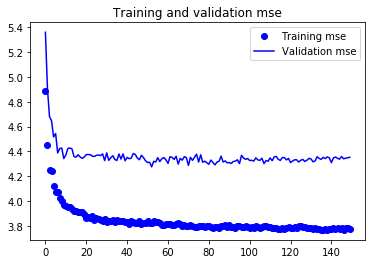

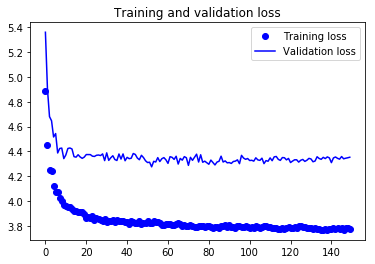

In [24]:
# accuracy = model_train.history['acc']
# val_accuracy = model_train.history['val_acc']
# loss = model_train.history['loss']
# val_loss = model_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training mse')
plt.plot(epochs, val_accuracy, 'b', label='Validation mse')
plt.title('Training and validation mse')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig(workdir + '//EC11K_ResNet_mse_loss_plot.png')
plt.show()

In [25]:
predicted_classes = model.predict(test_X)

In [26]:
predicted_value = predicted_classes

In [27]:
a = pd.DataFrame(predicted_value)
b = pd.DataFrame(test_label_array)
c = pd.concat([a,b], axis=1)
c.columns=["Predicted","Test"]

In [28]:
c.to_csv(workdir + '//EC11K_ResNet_Predicted_test_val_for_plot.csv')

In [29]:
c

,Predicted,Test
0,0.541882,-3.533074
1,1.169476,-0.203329
2,0.908256,-3.005719
3,1.228112,-4.800177
4,1.139230,2.079442
5,1.150051,2.079442
6,0.753845,0.886114
7,-1.234400,1.700495
8,0.503299,2.079442
9,0.541517,1.173165


In [30]:
predicted_value.shape

(1136, 1)

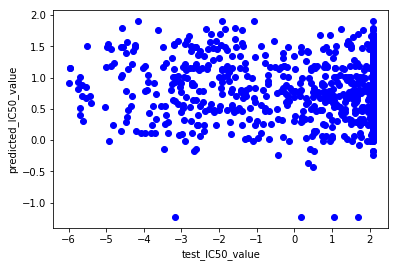

In [31]:
plt.scatter(test_label_array,predicted_value,c='blue')
plt.xlabel('test_IC50_value')
plt.ylabel('predicted_IC50_value')
plt.savefig(workdir + '//EC11K_ResNet_test_scatterplot.png')

In [32]:
rse = ((b[0]-a[0])**2).sum()
mse = rse / len(b)
print("Final rmse value is =",np.sqrt(mse))

Final rmse value is = 2.0863509153083233
